# simple questions of complex number

In [96]:
3 + 2j

(3+2j)

In [2]:
a = 3
b = 3
z = a + b * 1j
print('z= ', z)

z=  (3+3j)


In [3]:
print('The type of the variable is ', type(z))

The type of the variable is  <class 'complex'>


In [4]:
(2.75+3.69j)*(8.55-6.13j)

(46.1322+14.692000000000004j)

In [5]:
import math
import numpy
1.4 * numpy.exp(5.32j)

(0.79927078585823497-1.1494199453957457j)

In [6]:
(7.51-9.15j)/(4.43+9.64j)

(-0.4880897698448308-1.0033441577191493j)

# Shapes created by the Joukowski transformation

In [7]:
#set a circle for 1st question
R = 1.5
theta = numpy.linspace(0, 2*math.pi, 100)
x = R*numpy.cos(theta)
y = R*numpy.sin(theta)
c = 1.0

In [8]:
#define a fuction to get the transfomation
def get_E(x, y):
    """
    Returns the transformation generated by the cartesian coordinates
    x, y: the postion in cartesian coordinates
    E : the transfer result 
    """
    z = x + y*1j
    E = z + c**2/z
    
    return E

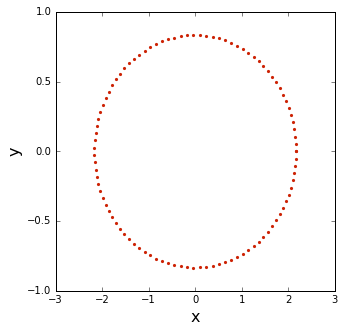

In [98]:
#plot the figure of the circle
E1 = get_E(x, y)
from matplotlib import pyplot
%matplotlib inline
size = 10
pyplot.figure(figsize=(5,5))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.scatter(E1.real,E1.imag, s=10, color='#CD2305', marker='o', linewidth=0)

In [11]:
#set the circle for 2nd question
R2 = 1.2

theta = numpy.linspace(0, 2*math.pi, 100)
x2 = R2*numpy.cos(theta)+(c-R2)
y2 = R2*numpy.sin(theta)

#get the trasformation
E2 = get_E(x2, y2)

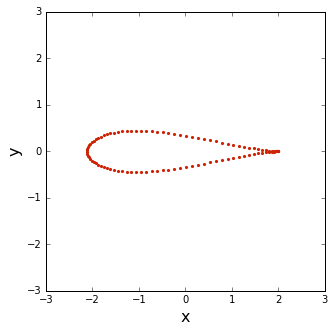

In [99]:
#get the figure of the transformation
size = 10
pyplot.figure(figsize=(5,5))
pyplot.xlim(-3.0, 3.0)
pyplot.ylim(-3.0, 3.0)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.scatter(E2.real,E2.imag, s=10, color='#CD2305', marker='o', linewidth=0)

In [13]:
#set the circle for 3rd question
delta_x, delta_y = -0.1, 0.1
R3 = ((c-delta_x)**2+delta_y**2)**0.5

theta = numpy.linspace(0, 2*math.pi, 100)
x3 = R3*numpy.cos(theta)+delta_x
y3 = R3*numpy.sin(theta)+delta_y

E3 = get_E(x3, y3)

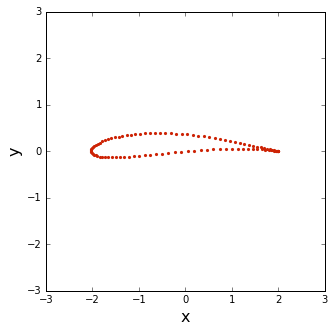

In [100]:
#plot the figure for the transformation
size = 10
pyplot.figure(figsize=(5,5))
pyplot.xlim(-3.0, 3.0)
pyplot.ylim(-3.0, 3.0)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.scatter(E3.real,E3.imag, s=10, color='#CD2305', marker='o', linewidth=0)

In [15]:
#set the meshgrid
delta_x1, delta_y1 = -0.15, 0
R4 = 1.15

r = numpy.linspace(R4, 5, 100)
theta1 = numpy.linspace(0, 2*math.pi, 145)
R_m, THETA = numpy.meshgrid(r, theta1)

x4 = R_m*numpy.cos(THETA)+delta_x1
y4 = R_m*numpy.sin(THETA)+delta_y1

numpy.shape(x4)

(145, 100)

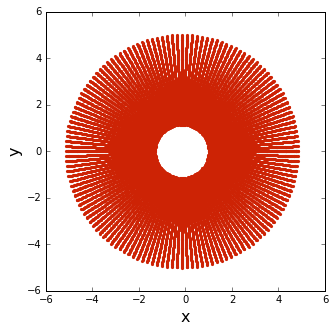

In [101]:
#plot the meshgrid figure in z coordinates
size = 10
pyplot.figure(figsize=(5,5))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.scatter(x4,y4, s=10, color='#CD2305', marker='o', linewidth=0)

In [17]:
E4 = get_E(x4, y4)
numpy.shape(E4)

(145, 100)

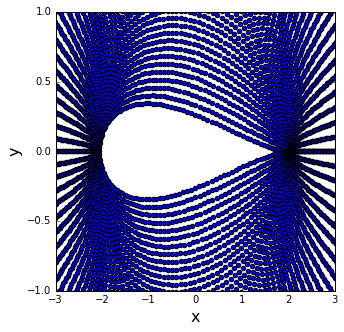

In [102]:
#plot the meshgrid figure in E coordinates
size = 10
pyplot.figure(figsize=(5,5))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-3.0, 3.0)
pyplot.ylim(-1.0, 1.0)
pyplot.scatter(E4.real,E4.imag, s=10, color='#CD2305', marker='o', linewidth=0)
pyplot.scatter(E4.real,E4.imag)

In [103]:
#set the freee stream and get the strength
u_inf = 1.0
R5 = 1.15
kappa = R5**2*2*math.pi*u_inf
print('the strength of the doublet:',kappa)

the strength of the doublet: 8.309512568745001


In [20]:
#define the fuction of the velocity and the stream
def get_velocity_doublet(strength, xd, yd, X, Y):
    """Returns the velocity field generated by a doublet.
    
    Arguments
    ---------
    strength -- strength of the doublet.
    xd, yd -- coordinates of the doublet.
    X, Y -- mesh grid.
    """
    u = - strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v = - strength/(2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
    """Returns the stream-function generated by a doublet.
    
    Arguments
    ---------
    strength -- strength of the doublet.
    xd, yd -- coordinates of the doublet.
    X, Y -- mesh grid.
    """
    psi = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    
    return psi

## free stream without angle

In [104]:
# computes the velocity field on the mesh grid
u_doublet, v_doublet = get_velocity_doublet(kappa, delta_x1, delta_y1, x4, y4)

# computes the stream-function on the mesh grid
psi_doublet = get_stream_function_doublet(kappa, delta_x1, delta_y1, x4, y4)

# freestream velocity components
u_freestream = u_inf * numpy.ones((145, 100), dtype=float)
v_freestream = numpy.zeros((145, 100), dtype=float)

# stream-function of the freestream flow
psi_freestream = u_inf * y4

# superposition of the doublet on the freestream flow
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet


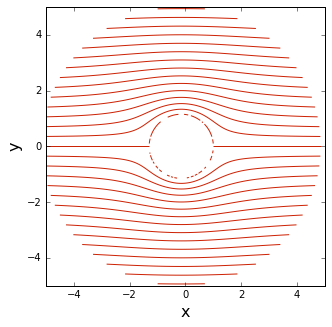

In [22]:
# plots the streamlines in z coordinates
pyplot.figure(figsize=(5,5))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-5.0,5.0)
pyplot.ylim(-5.0,5.0)
pyplot.contour(x4, y4, psi, levels = numpy.linspace(-5,5,31),colors='#CD2305', linewidths=1, linestyles='solid')

In [105]:
E5 = get_E(x4, y4)

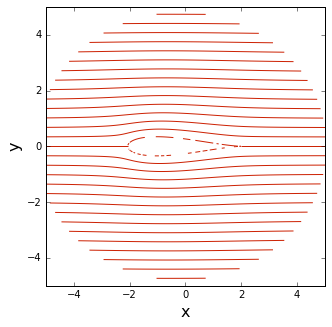

In [24]:
# plots the streamlines in E coordinates
pyplot.figure(figsize=(5,5))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-5.0,5.0)
pyplot.ylim(-5.0,5.0)
pyplot.contour(E5.real, E5.imag, psi, levels = numpy.linspace(-5,5,31),colors='#CD2305', linewidths=1, linestyles='solid')

In [27]:
z = x4 + y4*1j
W = (u - v*1j)/(1-(c/z)**2)

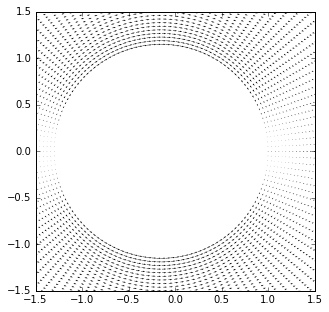

In [106]:
#plot the velocity in z coordinates
pyplot.figure(figsize=(5,5))
pyplot.xlim(-1.5, 1.5)
pyplot.ylim(-1.5, 1.5)
pyplot.quiver(x4, y4, u, v, units='xy',pivot='tip',width=0.005,scale=40)

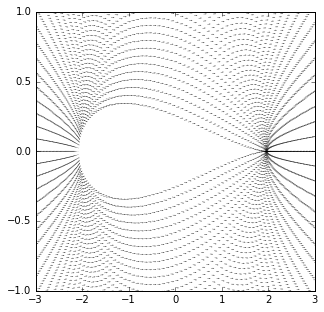

In [107]:
#plot the velocity in E coordinates
pyplot.figure(figsize=(5,5))
pyplot.xlim(-3, 3)
pyplot.ylim(-1, 1)
pyplot.quiver(E5.real,E5.imag, W.real, W.imag, units='xy',pivot='tip',width=0.005,scale=20)

## get the result of some questions

In [109]:
print('the u component of the 62th point:',W.real[61, 0])

the u component of the 62th point: 1.10633846629


In [110]:
print('the v component of the 62th point:',-W.imag[61, 0])

the v component of the 62th point: 0.523633349298


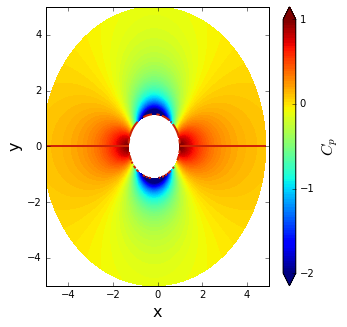

In [30]:
#pressure coefficient
cp = 1.0 - (u**2+v**2)/u_inf**2

# plots the pressure coefficient in z coordinates
size = 10
pyplot.figure(figsize=(5,5))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-5, 5)
pyplot.ylim(-5, 5)
contf = pyplot.contourf(x4, y4, cp, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.contour(x4,y4,psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');

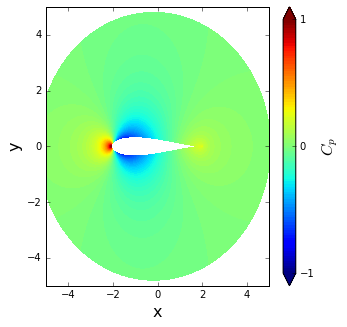

In [31]:
# plots the pressure coefficient in E coordinates
u_1 = W.real
v_1 = W.imag
cp1 = 1.0 - (u_1**2+v_1**2)/u_inf**2
size = 10
pyplot.figure(figsize=(5,5))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-5, 5)
pyplot.ylim(-5, 5)
contf = pyplot.contourf(E5.real,E5.imag, cp1, levels=numpy.linspace(-1.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])


In [111]:
print('the smallest cp on the surface:', numpy.min(cp1))

the smallest cp on the surface: -0.687755674092


## the free stream with angle

In [32]:
#set the z' coordinates with an angle
x5 = (x4-delta_x1)*numpy.cos(20*math.pi/180)+(y4-delta_y1)*numpy.sin(20*math.pi/180)
y5 = -(x4-delta_x1)*numpy.sin(20*math.pi/180)+(y4-delta_y1)*numpy.cos(20*math.pi/180)
#get the psi of the freestream in z' coordinates
psi_freestream1 = u_inf * y5
#get the u and v velocity in z' coordinates
u_doublet1, v_doublet1 = get_velocity_doublet(kappa, 0, 0, x5, y5)
#get the psi in z' coordinates
psi_doublet1 = get_stream_function_doublet(kappa, 0, 0, x5, y5)
#the total u and v velocity in z' coordinates
u1 = 1 + u_doublet1
v1 = 0 + v_doublet1
#the toal psi in z' coordinates
psi1 = psi_freestream1 + psi_doublet1
#transfer the u and v velocity back to z coordinates 
u2 = u1*numpy.cos(20*math.pi/180) - v1*numpy.sin(20*math.pi/180)
v2 = u1*numpy.sin(20*math.pi/180) + v1*numpy.cos(20*math.pi/180)

In [88]:
U = (u2**2+v2**2)**0.5
numpy.where(U == numpy.min(U))

(array([80]), array([0]))

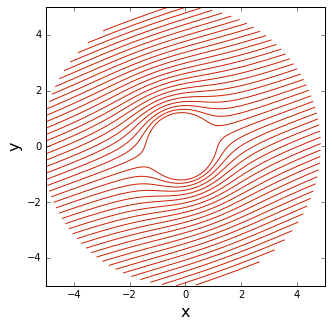

In [33]:
# plots the streamlines in z coordinates
pyplot.figure(figsize=(5,5))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-5.0,5.0)
pyplot.ylim(-5.0,5.0)
pyplot.contour(x4, y4,psi1, levels = numpy.linspace(-5,5,50),colors='#CD2305', linewidths=1, linestyles='solid')

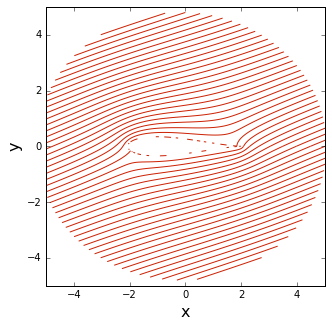

In [34]:
# plots the streamlines in E coordinates
pyplot.figure(figsize=(5,5))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-5.0,5.0)
pyplot.ylim(-5.0,5.0)
pyplot.contour(E5.real, E5.imag, psi1, levels = numpy.linspace(-5,5,51),colors='#CD2305', linewidths=1, linestyles='solid')

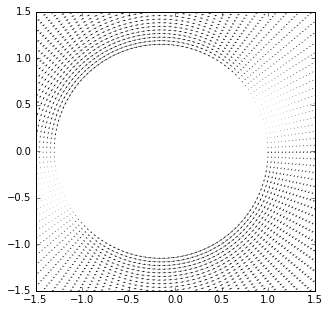

In [112]:
#plot the velocity in z coordinates
pyplot.figure(figsize=(5,5))
pyplot.xlim(-1.5, 1.5)
pyplot.ylim(-1.5, 1.5)
pyplot.quiver(x4, y4, u2, v2, units='xy',pivot='tip',width=0.005,scale=40)

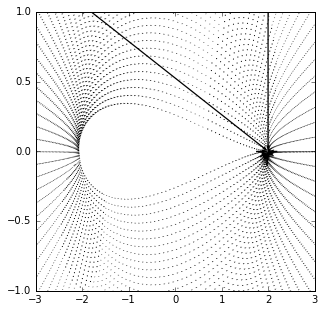

In [114]:
#plot the velocity in E coordinates
W1 = (u2 - v2*1j)/(1-(c/z)**2)
pyplot.figure(figsize=(5,5))
pyplot.xlim(-3, 3)
pyplot.ylim(-1, 1)
pyplot.quiver(E5.real,E5.imag, W1.real, -W1.imag, units='xy',pivot='tip',width=0.02,scale=40)

In [115]:
print('the u component of 50th point:',W1.real[49,0])

the u component of 50th point: 1.48306541501


In [116]:
print('the v component of 50th point:',-W1.imag[49,0])

the v component of 50th point: 0.0920754950073


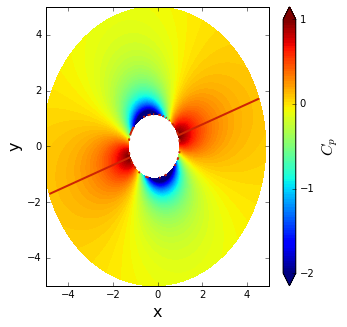

In [117]:
#pressure coefficient
cp2 = 1.0 - (u2**2+v2**2)/u_inf**2
#plot the pressure coefficient in z coordinates
size = 10
pyplot.figure(figsize=(5,5))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-5, 5)
pyplot.ylim(-5, 5)
contf = pyplot.contourf(x4, y4, cp2, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.contour(x4,y4,psi1, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');

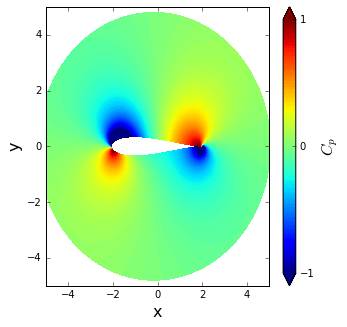

In [118]:
#plot the pressure coefficient in E coordinates
u_2, v_2 = W1.real, -W1.imag
cp_2 = 1.0 - (u_2**2+v_2**2)/u_inf**2
size = 10
pyplot.figure(figsize=(5,5))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-5, 5)
pyplot.ylim(-5, 5)
contf = pyplot.contourf(E5.real,E5.imag, cp_2, levels=numpy.linspace(-1.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])

In [121]:
print('the pressure coefficient at the 75th point',cp_2[74, 0])

the pressure coefficient at the 75th point -0.485209916437


In [119]:
print('the u component of the 50th point:',u_2[49, 0])

the u component of th 50th point: 1.48306541501


In [120]:
print('the v component of the 50th point:',v_2[49,0])

the v component of the 50th point: 0.0920754950073


In [128]:
velocity_total = (u2**2+v2**2)**0.5
A = numpy.min(velocity_total)
second_point=sorted(velocity_total[:,0])[1]
print('the first stagnation point:',numpy.where(velocity_total == A)[0][0]+1)
print('the second stagnation point:',numpy.where(velocity_total == second_point)[0][0]+1)

the first stagnation point: 81
the second stagnation point: 9


In [129]:
gamma = -1*4*math.pi*1.15*numpy.sin(-20*math.pi/180)
print('the strength of vortex:',gamma)

the strength of vortex: 4.9426446604


## Flow over a symmetric Joukowski airfoil with non-zero angle of attack

In [44]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    """Returns the velocity field generated by a vortex.
    
    Arguments
    ---------
    strength -- strength of the vortex.
    xv, yv -- coordinates of the vortex.
    X, Y -- mesh grid.
    """
    u = + strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = - strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    return u, v

def get_stream_function_vortex(strength, xv, yv, X, Y):
    """Returns the stream-function generated by a vortex.
    
    Arguments
    ---------
    strength -- strength of the vortex.
    xv, yv -- coordinates of the vortex.
    X, Y -- mesh grid.
    """
    psi = strength/(4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    
    return psi

In [130]:
#get the u and v velocity in z' coordinates
u_vortex, v_vortex = get_velocity_vortex(gamma, 0, 0, x5, y5)
psi_vortex = get_stream_function_vortex(gamma, 0, 0, x5, y5)
#get the totoal u, v velocity and psi in z' coordinates
u3 = u1 + u_vortex
v3 = v1 + v_vortex
psi3 = psi1 + psi_vortex
#tranform the velocity into z coordinates
u_3 = u3*numpy.cos(20*math.pi/180) - v3*numpy.sin(20*math.pi/180)
v_3 = u3*numpy.sin(20*math.pi/180) + v3*numpy.cos(20*math.pi/180)

In [131]:
u_3[91, 0]

0.1765461748702552

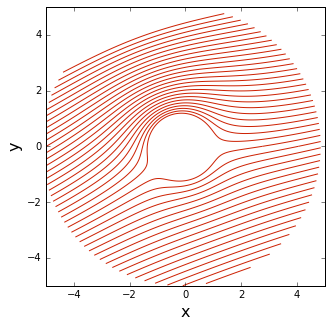

In [132]:
# plots the streamlines in z coordinates
pyplot.figure(figsize=(5,5))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-5.0,5.0)
pyplot.ylim(-5.0,5.0)
pyplot.contour(x4, y4,psi3, levels = numpy.linspace(-5,5,51),colors='#CD2305', linewidths=1, linestyles='solid')

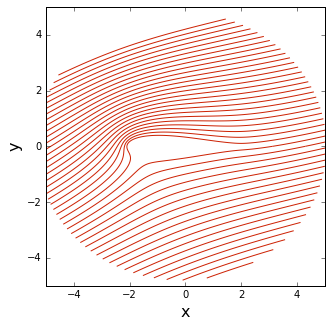

In [133]:
# plots the streamlines in z coordinates
pyplot.figure(figsize=(5,5))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-5.0,5.0)
pyplot.ylim(-5.0,5.0)
pyplot.contour(E5.real, E5.imag, psi3, levels = numpy.linspace(-5,5,51),colors='#CD2305', linewidths=1, linestyles='solid')

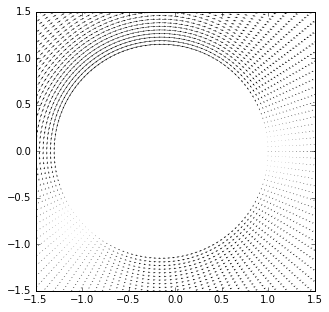

In [134]:
#plot tht velocity in z coordinates
pyplot.figure(figsize=(5,5))
pyplot.xlim(-1.5, 1.5)
pyplot.ylim(-1.5, 1.5)
pyplot.quiver(x4, y4, u_3, v_3, units='xy',pivot='tip',width=0.005,scale=40)

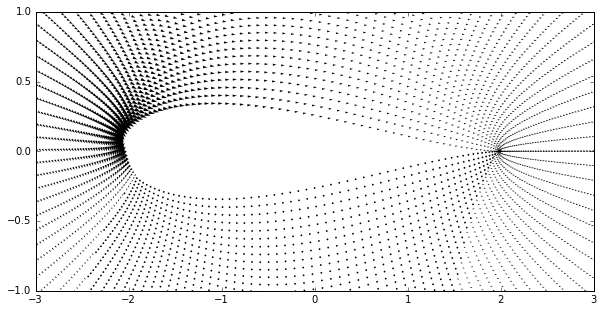

In [64]:
#plot the velocity in E coordinates
W2 = (u_3 - v_3*1j)/(1-(c/z)**2)
pyplot.figure(figsize=(10,5))
pyplot.xlim(-3, 3)
pyplot.ylim(-1, 1)
pyplot.quiver(E5.real,E5.imag, W2.real, W2.imag, units='xy',pivot='tip',width=0.02,scale=40)

In [136]:
U1 = (W2.real**2+(-W2.imag)**2)**0.5
print('the first stagnation point is at',numpy.where(U1 == numpy.min(U1))[0][0]+1)

the first stagnation point is at 89


In [137]:
print('the u component of 92th point',W2.real[91, 0])

the u component of 92th point 0.208483116207


In [138]:
print('the v componen of 92th point',-W2.imag[91, 0])

the v componen of 92th point -0.0319883891951


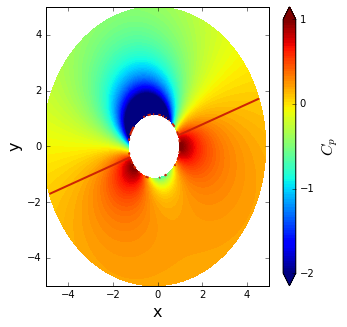

In [66]:
#pressure coefficient
cp3 = 1.0 - (u_3**2+v_3**2)/u_inf**2
#plot the pressure coefficient in z coordinates
size = 10
pyplot.figure(figsize=(5,5))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-5, 5)
pyplot.ylim(-5, 5)
contf = pyplot.contourf(x4, y4, cp3, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.contour(x4,y4,psi1, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');

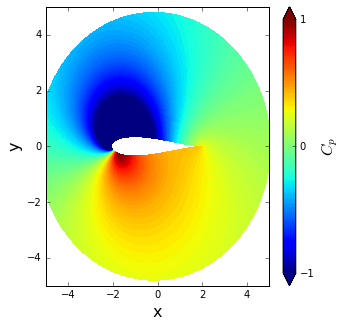

In [68]:
#plot the pressure coefficient in z' coordinates
u_4, v_4 = W2.real, -W2.imag
cp_3 = 1.0 - (u_4**2+v_4**2)/u_inf**2
size = 10
pyplot.figure(figsize=(5,5))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-5, 5)
pyplot.ylim(-5, 5)
contf = pyplot.contourf(E5.real,E5.imag, cp_3, levels=numpy.linspace(-1.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])

In [139]:
print('the pressure coefficient of the 111th point',cp_3[110, 0])

the pressure coefficient of the 111th point 0.496694672383
